# Infleqtion DCM4 Training
### Tuesday, 18 Feb 2025

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/dcm4/Infleqtion-DCM4-Challenge/Infleqtion_DCM4_Training.ipynb)

# 0) Set up Training Environment

In [1]:
try:
    import qiskit_superstaq as qss
except ImportError:
    print("Installing qiskit-superstaq...")
    %pip install --quiet 'qiskit-superstaq[examples]'
    print("Installed qiskit-superstaq.")
    print("You may need to restart the kernel to import newly installed packages.")

import qiskit
import qiskit_superstaq as qss
import numpy as np

Installing qiskit-superstaq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 

In [2]:
from IPython.display import display
def visualize_bloch_sphere(qc):
    qc.remove_final_measurements()
    sv = qiskit.quantum_info.Statevector(qc)
    display(qiskit.visualization.plot_bloch_multivector(sv))

# 1) First Quantum circuits

## 1. Setting up the simulator
For this part, you will run your quantum circuits on a simulator accessed through `Superstaq`.

#### Set up access to Superstaq's API
You will need to first retrieve your Superstaq API key from https://superstaq.infleqtion.com. Pass your token to the `api_key` parameter of `qss.SuperstaqProvider()`.

In [11]:
provider = qss.SuperstaqProvider(api_key="d03d4348c7189abc79046db3f840670fdac89f240b69aab2b6900b7ba4db9947")
backend = provider.get_backend("ibmq_brisbane_qpu")

## 2. Quantum Coin Toss
### Fair coin
This first quantum circuit aims at giving a sense of what superposition is and how it relates to the measurements outcomes. Here we will build a one qubit circuit resulting in the qubit being in a superposition such that the probability of measuring 0 or 1 is the same, akin to a coin toss. There are many ways to reach such state but the most common one is by simply applying the Hadamard gate.

First we create a quantum circuit and store it in the variable ```qct``` with the line ```qct = qiskit.QuantumCircuit(1)``` and draw it with ```qct.draw("mpl", style="clifford")```. The arguments `"mpl"` and `"clifford"` are only here to control the style of the drawing.

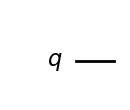

In [4]:
qct = qiskit.QuantumCircuit(1)
qct.draw("mpl", style="clifford")

We can also visualize the state of the qubit at this stage:

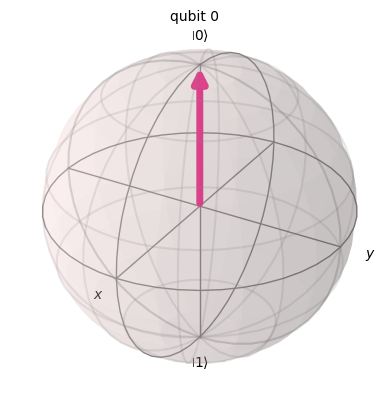

In [5]:
visualize_bloch_sphere(qct)

Now that the circuit has been created, we can add a $\mathbf{H}$ gate to act on the qubit ($q$) with the line `qc.h(0)`:

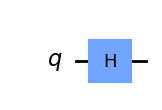

In [6]:
qct.h(0)
qct.draw("mpl", style="clifford")

And visualize the effect of this gate on the qubit:

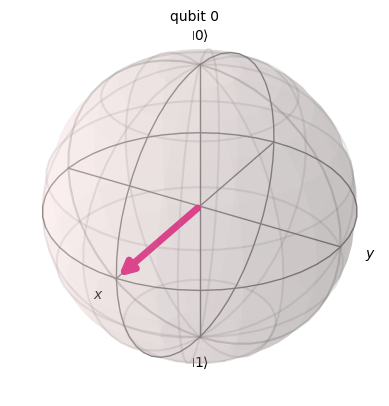

In [7]:
visualize_bloch_sphere(qct)

Finally, as said previously, a quantum circuit will end with measurements that are added to the circuit via ```qct.measure_all()```

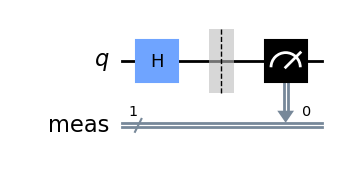

In [8]:
qct.measure_all()
qct.draw("mpl", style="clifford")

Notice the appearence of a grey double-wire marked with `meas` in the circuit representation. This double-wire represents a classical bit where the outcome of the measurement will be stored.

Now we can run the quantum circuit. Similar to a random experiment we will run it multiple times to determine the probability of each possible outcome.

The line `job_qct = backend.run(qct, method="dry-run", shots=1000)` will run the circuit stored in the variable `qct` **1000** times. With the argument `method="dry-run"`, the simulations will be performed on a GPU instead of real quantum hardware.

In [13]:
job_qct = backend.run(qct, method="dry-run", shots=1000)
job_qct.status()

<JobStatus.DONE: 'job has successfully run'>

Now that the job has run successfully, we can retrieve the results of the measurements with `results_qct = job_qct.result().get_counts()` and plot them as a histogram.

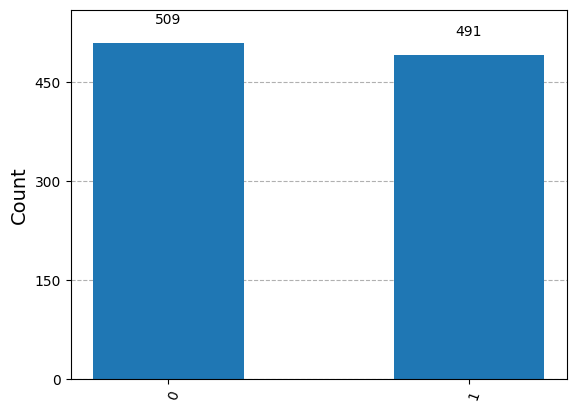

In [14]:
results_qct = job_qct.result().get_counts()
qiskit.visualization.plot_histogram(results_qct)

The results should be close to 50/50 so our quantum coin is fair.

### Biased coin
We will now show how to modify the amplitudes of a superposition to build a **biased** quantum coin. In the following cell, `bias` is the probability of measuring 1. We can change this value and see the impact on the qubit's location on the Bloch sphere.

In [18]:
bias = 0  # You can change this value

In the following, the gate `ry(2 * np.arcsin(np.sqrt(bias)), 0)` has matrix representation:
$$
    \begin{bmatrix}\sqrt{1 - bias} & -\sqrt{bias} \\ \sqrt{bias} & \sqrt{1 - bias}\end{bmatrix}
$$
So it will bring the qubit from the state $|0\rangle$ to the superposition:
$$
    \sqrt{1 - bias}|0\rangle + \sqrt{bias}|1\rangle
$$

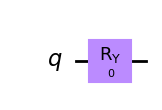

In [19]:
bqct = qiskit.QuantumCircuit(1)
bqct.ry(2 * np.arcsin(np.sqrt(bias)), 0)
bqct.draw("mpl", style="clifford")

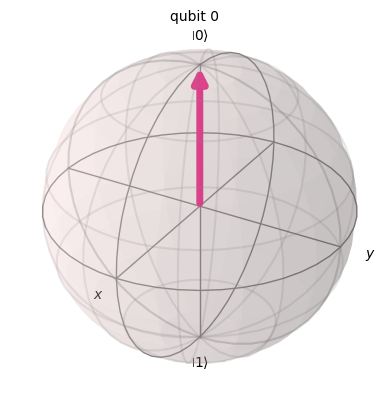

In [20]:
visualize_bloch_sphere(bqct)

You can check that as `bias` tends to $1$, the state of the qubit will converge to the south pole, that is to the state $|1\rangle$. Conversely, as `bias` gets closer to $0$, the state of the qubit will go to the north pole, ie the state $|0\rangle$.

In [ ]:
bqct.measure_all()
bqct.draw("mpl", style="clifford")

This change of the qubit's location on the Bloch sphere should also translate into a change in the measurement statistics.

In [ ]:
job_bqct = backend.run(bqct, method="dry-run", shots=1000)
job_bqct.status()

In [ ]:
results_bqct = job_bqct.result().get_counts()
qiskit.visualization.plot_histogram(results_bqct)

As we can see, our quantum coin is indeed biased.

## 3. Bell state and entanglement

The following circuit will explore the impact of entanglement on measurement outcomes.

Our goal is to end up with the qubits in the entangled state described in Equation (1):
$$
    |q_0q_1\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
$$
This state is one of the 4 Bell states. These states hold a particular importance in the field of quantum mechanics as they are at the heart of the proof of the existence of quantum entanglement.  

To create this state, we will apply the gates mentioned in Equations (3) and (4):
- First apply a Hadamard gate to the first qubit.
- Then apply a $\mathbf{CX}$ gate where the control is the first qubit and the target is the second qubit. It can be done with the method `qc_ent.cx(ctrl, targ)` where `ctrl` is the index of the control qubit and `targ` is that of the target qubit.

The circuit should look like this:
<center>
    <img src="https://github.com/Infleqtion/client-superstaq/blob/dcm4/Infleqtion-DCM4-Challenge/images/qc_ent.png?raw=1"/>
</center>

### <b><font color='green'>Build the above circuit in the cell below:</font></b>

In [ ]:
qc_ent = qiskit.QuantumCircuit(2, 2)
####################################################################################################
## Insert code below:

####################################################################################################
qc_ent.draw("mpl", style="clifford")

At this stage, the qubits should be in state:
$$
    |q_0q_1\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
$$

That is, the 2 qubits are entangled. One implication of this state is that if we perform a measurement on one of the qubit, hence collapsing its state to the one that has been measured, then this operation will also affect the other qubit, also collapsing it to the corresponding state.

Let us verify this claim by first measuring the first qubit:

In [ ]:
qc_ent.measure(0, 0)
qc_ent.draw("mpl", style="clifford")

We then wait a bit and measure the second qubit. The wait is performed by **I** added to the circuit with the line `qc_ent.id(1)`.

In [ ]:
qc_ent.id(1)
qc_ent.measure(1, 1)
qc_ent.draw("mpl", style="clifford")

We now run this circuit as previously:

In [ ]:
job_ent = backend.run(qc_ent, method="dry-run", shots=1000)
job_ent.status()

In [ ]:
result_ent = job_ent.result().get_counts()
qiskit.visualization.plot_histogram(result_ent)

As shown by the results, whenever the measurement on the first qubit returned $0$, the measurement on the second qubit also returned $0$. A similar observation holds when $1$ was measured on the first qubit.

As an example of what similar measurement would result in for 2 qubits that are not entangled, we consider the following state:
$$
    |q_0q_1\rangle = \frac{1}{2}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle = \left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right)\left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right)
$$
This state can be created with a 2 qubits circuit by applying a Hadamard gate to each of the qubit.

The circuit should look like this:
<center>
    <img src="https://github.com/Infleqtion/client-superstaq/blob/dcm4/Infleqtion-DCM4-Challenge/images/qc_nent.png?raw=1"/>
</center>

### <b><font color='green'>Build the above circuit in the cell below:</font></b>

In [ ]:
qc_nent = qiskit.QuantumCircuit(2, 2)
####################################################################################################
## Insert code below:

####################################################################################################
qc_nent.draw("mpl", style="clifford")

We will use the same measurement scheme as previously:
- measure the first qubit
- wait
- measure the second qubit

In [ ]:
qc_nent.measure(0, 0)
qc_nent.id(1)
qc_nent.measure(1, 1)
qc_nent.draw("mpl", style="clifford")

In [ ]:
job_nent = backend.run(qc_nent, method="dry-run", shots=1000)
result_nent = job_nent.result().get_counts()
qiskit.visualization.plot_histogram(result_nent)

As shown by the results, the outcome of the second measurement is not entirely correlated to the outcome of the first measurement -- some results return `01`.

# Appendix

### A Quick Introduction to Complex Numbers

- Prior to introducing quantum computing concepts we have to briefly mention **complex numbers** as they are essential to the field of quantum mechanics as a whole.

- The field of complex numbers can be seen as an extension of the field of real numbers (the numbers used in everyday life) where the imaginary unit $i$ has been introduced. The imaginary unit's defining property is that it is such that:
$$
    i^2 = -1
$$
From there, if $a$ and $b$ are real numbers, we can define a complex number $c$ as:
$$
    c = a + i \times b
$$
- One quantity associated to a complex number $c$ is its magnitude, denoted $|c|$ and defined as:
$$
    |c| = \sqrt{a^2+b^2}
$$
The magnitude quantifies the "length" of the complex number.

- As examples, $-3$, $4i$ and $4-3i$ are all complex numbers with magnitude $3$, $4$ and $5$ respectively. $(1+i) + (1-i)i$ is also a complex number as $(1+i) + (1-i)i = 1 + i + i - i^2 = 2 + 2i$ and its magnitude is $2\sqrt{2}$.

# A1) What is a Quantum Computer?
A quantum computer is a device that processes information by leveraging quantum properties, in particular **superposition** and **entanglement**. The operations are performed by quantum gates acting on qubits.
## 1. Qubits  

### One qubit
- The quantum analog to the classical bit is the qubit (quantum bit). While the bit can either be in state $0$ or $1$, the qubit can be in a **superposition** of the states $|0\rangle$ and $|1\rangle$. This means that its quantum state can be described by:
$$
    c_0|0\rangle + c_1|1\rangle
$$
Where $c_0$ and $c_1$, called the amplitudes, are complex numbers such that:
$$
    |c_0|^2+|c_1|^2 = 1
$$
- The issue is that we do not have access to this superposition of states directly but rather via measurements that will only return $0$ or $1$. The result of a measurement is nonetheless correlated to the quantum state of the qubit in the sense that the probabilities to measure $0$ or $1$ are respectively $|a|^2$ or $|b|^2$ respectively. Following the measurement, the qubit will collapse to the measured state.

- As an example, we consider the qubit $|q\rangle$ in the state:
$$
    |q\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle
$$
As stated previously we can not observe this quantum state, only measure it. A measurement of this state would then return $0$ with probability $\left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$ and $1$ with probability $\left|\frac{i}{\sqrt{2}}\right|^2 = \frac{1}{2}$. If $0$ is measured, then immediately after the measurement, we will have $|q\rangle = |0\rangle$. Similarly, if $1$ is measured, then immediately after the measurement, we will have $|q\rangle = |1\rangle$.

### Bloch Sphere
- While the idea of quantum superposition can seem abstract, there exists a visual representation of this concept with the Bloch sphere. As said previously, a single qubit $|\psi\rangle$ can be completely described by:
$$
    |\psi\rangle = c_0|0\rangle + c_1|1\rangle
$$
Where $c_0$ and $c_1$ are complex numbers such that:
$$
    |c_0|^2+|c_1|^2 = 1
$$
This condition can be rewritten as:
$$
    c_0 = \cos(\theta/2) \text{ and } c_1 = \sin(\theta/2)e^{i\phi}
$$
Where $0 \leq \theta \leq \pi$ and $0 \leq \phi \leq 2\pi$. We thus have:
$$
    |\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)e^{i\phi}|1\rangle
$$

- Now if we represent a sphere where the north pole is $|0\rangle$ and the south pole is $|1\rangle$, then $\theta$ and $\phi$ can be seen as coordinates: the colatitude and longitude.

<center>
    <img src="https://github.com/Infleqtion/client-superstaq/blob/dcm4/Infleqtion-DCM4-Challenge/images/Bloch_sphere.png?raw=1">
</center>
<center>
    <a href="https://en.wikipedia.org/wiki/Bloch_sphere"> Bloch sphere</a>
</center>



- A qubit can thus be represented by a point situated at the surface of this sphere.

### Multiple qubits
- Similar to classical computers, quantum computers can work with multiple qubits. In the case of 2 qubits, the 2 qubits system $|q_0\rangle|q_1\rangle$ (for conciseness, one can write $|q_0q_1\rangle$ instead of $|q_0\rangle|q_1\rangle$ for example) can  be in a superposition of the states: $|0\rangle|0\rangle$, $|0\rangle|1\rangle$, $|1\rangle|0\rangle$ and $|1\rangle|1\rangle$ :
$$
    |q_0 q_1\rangle = c_{00}|00\rangle + c_{01}|01\rangle + c_{10}|10\rangle + c_{11}|11\rangle
$$
Where $c_{00}$, $c_{01}$, $c_{10}$, $c_{11}$ are also complex numbers such that:
$$
    |c_{00}|^2 + |c_{01}|^2 + |c_{10}|^2 + |c_{11}|^2 = 1
$$

- Generally, a system of $n$ qubits can be in a superposition of $2^n$ states. For an integer $j$, if $\bar{j}$ is its binary representation, then the system $|q_0q_1\ldots q_{n-1}\rangle $ can be in the superposition:
$$
    |q_0q_1\ldots q_{n-1}\rangle = \sum_{j=0}^{2^n-1}{c_{\bar{j}}|\bar{j}\rangle}
$$
Here again, for $j=0, \ldots\ 2^n-1$, $c_{\bar{j}}$ are complex numbers with:
$$
    \sum_{j=0}^{2^n-1}{|c_{\bar{j}}|^2}
$$

- For example, a 2 qubits superposition could be:
$$
    |q_0q_1\rangle = \frac{1}{3}|00\rangle + \frac{\sqrt{3}i}{3}|01\rangle + \frac{1+i}{3}|10\rangle - \frac{\sqrt{3}}{3}|11\rangle
$$
- And a 3 qubits superposition could be:
$$
    |q_0q_2\rangle = -\frac{2}{5}|001\rangle + \frac{3}{5}|010\rangle  -\frac{\sqrt{2}i}{5}|011\rangle + \frac{\sqrt{5}}{5}|101\rangle + \frac{\sqrt{3}}{5}|110\rangle + \frac{1-i}{5}|111\rangle
$$
Here, $c_{000} = c_{100} = 0$.

- In addition to superposition, systems of multiple qubits can also exhibit **entanglement**. At a high level, entanglement between 2 or more qubits happens when, after having interacted in a certain way, the state of each individiual qubit can not be described independantly, even if those qubits a separated in space. We give 2 examples to illustrate this behaviour.

- The system of 2 qubits in the state:
$$
    |q_0q_1\rangle = \frac{1}{2}|00\rangle-\frac{1}{2}|01\rangle+\frac{1}{2}|10\rangle-\frac{1}{2}|11\rangle
$$
Is not in an entangled state, indeed:
$$
    |q_0q_1\rangle = \left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right)\left(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle\right)
$$
So this system can be separated into two individual systems:
$$
    |q_0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \text{ and } |q_1\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle
$$

- On the other hand, a 2 qubit system in the state:
$$\tag{1}
    |q_0q_1\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
$$
Can not be split into 2 independant sytems. This means that the state of the first qubit can not be described on its own (it can not be written as a superposition of the form $c_0|0\rangle + c_1|1\rangle$) nor can be the state of the second qubit.

The qubits in a quantum computer being usually initialised in the state $|0\rangle$ we need a way to manipulate them to bring the system into a state exhibiting superposition and entaglement that is of interest regarding the problem to be solved. These operations are achieved by the quantum gates.  


## 2. Quantum Gates

- One of the ways to perform quantum computation is through the use of quantum gates. Similar to logic gates, quantum gates can act on one or more qubits.

- To better explain the effect of a quantum gate on qubits, it is common and convenient to adopt a matrix representation. One commonly used quantum gate is the Hadamard gate ($\mathbf{H}$) for which the matrix representation is:
$$
    \mathbf{H} =
        \begin{bmatrix}
            \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
            \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
        \end{bmatrix}
$$
The effect of this gate on a qubit in state $|0\rangle$, denoted $\mathbf{H}|0\rangle$, is described by the first column while the effect on $|1\rangle$, denoted $\mathbf{H}|1\rangle$, is described by the second column. If $|0\rangle$ is given as input of $\mathbf{H}$, the resulting quantum state will be:

$$\tag{2}
    \mathbf{H}|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
$$

Similarly, if $|1\rangle$ is given as input of $\mathbf{H}$, the resulting quantum state will be:
$$
    \mathbf{H}|1\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle
$$

- Another commom gate is the $\mathbf{X}$ gate for which the matrix is:
$$
    \mathbf{X} = \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}
$$
We then have on $|0\rangle$:
$$
    \mathbf{X}|0\rangle = 0|0\rangle + 1|1\rangle = |1\rangle
$$
And on $|1\rangle$:
$$
    \mathbf{X}|1\rangle = 1|0\rangle + 0|1\rangle = |0\rangle
$$

- An example of a gate acting on more than one qubit is the controlled $\mathbf{X}$ gate ($\mathbf{CX}$) that takes as input 2 qubits (a control qubit and a target qubit) and acts as a $\mathbf{X}$ gate on the target qubit when the control qubit is in state $|1\rangle$. If we apply this gate to 2 qubits where the first one is the control and the second is the target, then:
$$
    \mathbf{CX}|00\rangle = |00\rangle, \ \mathbf{CX}|01\rangle = |01\rangle, \ \mathbf{CX}|10\rangle = |11\rangle \text{ and } \mathbf{CX}|11\rangle = |10\rangle
$$
And we have the matrix following matrix representation:
$$
    \mathbf{CX} =
        \begin{bmatrix}
            1 & 0 & 0 & 0 \\
            0 & 1 & 0 & 0 \\
            0 & 0 & 0 & 1 \\
            0 & 0 & 1 & 0
        \end{bmatrix}
$$
- One important property of the quantum gates is the linearity: if a qubit is in a superposition, then the result of a gate applied to this qubit will also be a superposition. More precisely, assume that we have the qubit
$$
    |q\rangle = a|0\rangle + b|1\rangle
$$
Then, for example:
$$
    \mathbf{H}|q\rangle = a \mathbf{H}|0\rangle + b \mathbf{H}|1\rangle = a \left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right) + b \left(\frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle\right) = \frac{a+b}{\sqrt{2}}|0\rangle + \frac{a-b}{\sqrt{2}}|1\rangle
$$

- Multiple gates can also be executed sequentially. For example, let us work with 2 qubits starting in the state $|00\rangle$. We apply the $\mathbf{H}$ gate to the first qubit resulting in the quantum state:

\begin{equation}\tag{3}
    \left(\mathbf{H}|0\rangle\right)|0\rangle = \left(\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right)|0\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle
\end{equation}

Then applying the $\mathbf{CX}$ gate to the previous state leads to:
\begin{equation}\tag{4}
    \frac{1}{\sqrt{2}}\mathbf{CX}|00\rangle + \frac{1}{\sqrt{2}}\mathbf{CX}|10\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
\end{equation}

- The 2 qubits are now in an entangled state.

- In addition to the gates already mentionned ($\mathbf{H}$, $\mathbf{X}$, $\mathbf{CX}$), we introduce some additional common gates that might be useful:
$$
    \mathbf{S} = \begin{bmatrix}1&0\\0&i\end{bmatrix} \text{, } \mathbf{Y} = \begin{bmatrix}0&-i\\i&0\end{bmatrix} \text{ and } \mathbf{Z} =\begin{bmatrix}1&0\\0&-1\end{bmatrix}
$$

## 3. Measurements
- One important caveat in quantum computing is that we do not have direct access to a quantum state. The only way we can observe a quantum state is through measurement.

- The result of a measurement is probabilistic and will output a classical bit string.

- The probability for a bit string to be the outcome of the measurement is directly correlated to its amplitude in the superposition being measured.

- Suppose we are measuring the following 2 qubits quantum state:
$$
    |q_0q_1\rangle = \frac{1}{2}|01\rangle - \frac{i}{2}|10\rangle + \frac{1+i}{2}|11\rangle
$$
Then the possible outcomes of the measurement are $01$, $10$ and $11$. Each will happen with probability $\frac{1}{4}$, $\frac{1}{4}$ and $\frac{1}{2}$ respectively.

- Following a measurement the quantum state will collapse to the state corresponding to the bitstring that has been measured, the superposition being destroyed in the process.

- Suppose that the measurement performed on the previous state returns $10$, then after the measurement the 2 qubits are in the state:
$$
    |q_0q_1\rangle = |10\rangle
$$

## 4. Quantum Circuits
- Quantum circuits are the quantum analog to classical logic circuits. The qubits are represented by wires and the gates are represented by blocks placed on the wires (the qubits) they are acting on. Finally, the measurements, placed at the end of the circuit, are represented by meter signs.

![circuit](https://github.com/Infleqtion/client-superstaq/blob/dcm4/Infleqtion-DCM4-Challenge/images/circuit.png?raw=1)

- The point of quantum computing is thus to come up with a quantum circuit using these building blocks (qubits, quantum gates) to create superpositions and entanglements and manipulate them such that the final measurements output a classical information that is useful to the problem at hand.

- By creating and manipulating the right superpositions and entaglements, we can not only solve a problem of interest but most importantly we can do it more efficiently when compared to classical computing.